In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataframa9.csv")
df

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,GT3,T,1,3,no,no,no,yes,yes,no,5,4,2,4,10
1040,F,18,LE3,T,1,2,no,yes,no,no,yes,no,4,3,4,4,16
1041,F,18,GT3,T,2,2,no,no,no,yes,no,no,1,1,1,6,9
1042,M,17,LE3,T,2,1,no,no,no,no,yes,no,2,4,5,6,10


Atributos do dataset:
    
    1- 'sex': sexo
    
    2- 'age': idade
    
    3- 'famsize': tamanho da família; LE3 - famílias com no máximo 3 pessoas, GT3 caso contrário
    
    4- 'Pstatus': status de habitação com os pais; T - mora junto com os pais, A - mora separado;
    
    5- 'traveltime': tempo de viagem entre escola e casa; 
        1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora
        
    6- 'studytime': tempo de estudo semanal; 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas
    
    7- 'schoolsup': suporte educacional extra escola
    
    8- 'famsup': suporte educacional da família
    
    9- 'paid': pagou aulas particulares por fora 
    
    10- 'activities': atividades extra-curriculares
    
    11- 'internet': acesso a internet em casa
    
    12- 'romantic': se está num relacionamento
    
    13- 'famrel': qualidade das relações familiares; 1 - muito ruim a 5 - muito boa
    
    14- 'freetime': tempo livre após escola; 1 - muito pouco até 5 - muito
    
    15- 'goout': relaciona-se com amigos; 1 - muito pouco até 5 - muito
    
    16- 'absences': quantidade de faltas na escola
    
    17- 'G3': nota média final no ensino médio
    
<br>

No dataset acima, faça uma __análise exploratória__ geral, bem como __pré-processamentos__ nas variáveis.

Considere a variável __'G3'__ como a __variável target__ do problema - contexto de __regressão.__

Teste __diferentes modelos de regressão__ a fim de explicar a variável target. Use a metodologia da __validação cruzada__ e o __coeficiente de determinação ($R^{2}$)__ como métrica de performance.

Plote __gráficos__ personalizados com os resultados.

In [3]:
df.corr()['G3']
# A melhor correlacao é com a variável studytime(tempo de estudo semanal)

age          -0.125282
traveltime   -0.102627
studytime     0.161629
famrel        0.054461
freetime     -0.064890
goout        -0.097877
absences     -0.045671
G3            1.000000
Name: G3, dtype: float64

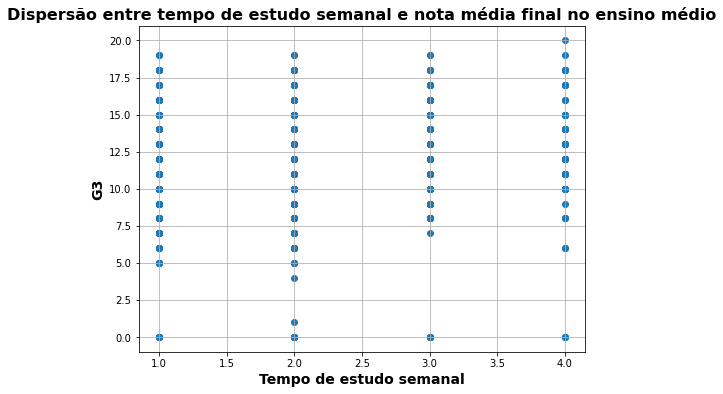

In [4]:
plt.figure(figsize=[8,6])
plt.scatter(df.studytime, df.G3)
plt.title("Dispersão entre tempo de estudo semanal e nota média final no ensino médio", fontsize = 16, fontweight = 'bold')
plt.xlabel("Tempo de estudo semanal", fontsize = 14, fontweight = 'bold')
plt.ylabel("G3", fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lm_exp = LinearRegression()
X = df.studytime.values.reshape(-1,1)
y = df.G3.values

lm_exp.fit(X, y)

LinearRegression()

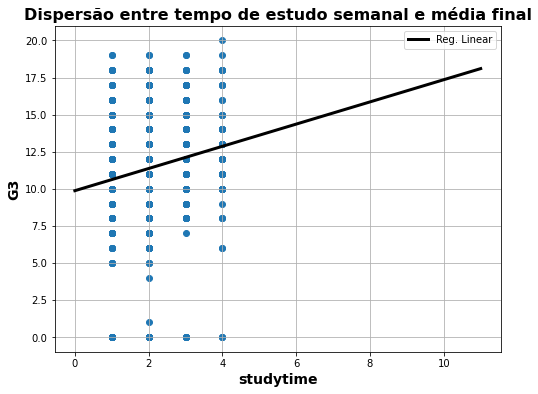

In [6]:
plt.figure(figsize=[8,6])
plt.scatter(df.studytime, df.G3)
plt.title("Dispersão entre tempo de estudo semanal e média final", fontsize = 16, fontweight = 'bold')
plt.xlabel("studytime", fontsize = 14, fontweight = 'bold')
plt.ylabel("G3", fontsize = 14, fontweight = 'bold')
plt.grid()

#inserindo a reta da regressão linear
xlims = np.arange(0,12)
plt.plot(xlims, lm_exp.predict(xlims.reshape(-1,1)), c = 'black', lw = 3, label = 'Reg. Linear')
plt.legend()
plt.show()

#nao me ficou claro usando regressao linear, vou transformar as variáveis e voltar a validar.

In [7]:
#KNN 
def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [8]:
X = df['G3'].values.reshape(-1,1)
y = df['studytime'].values

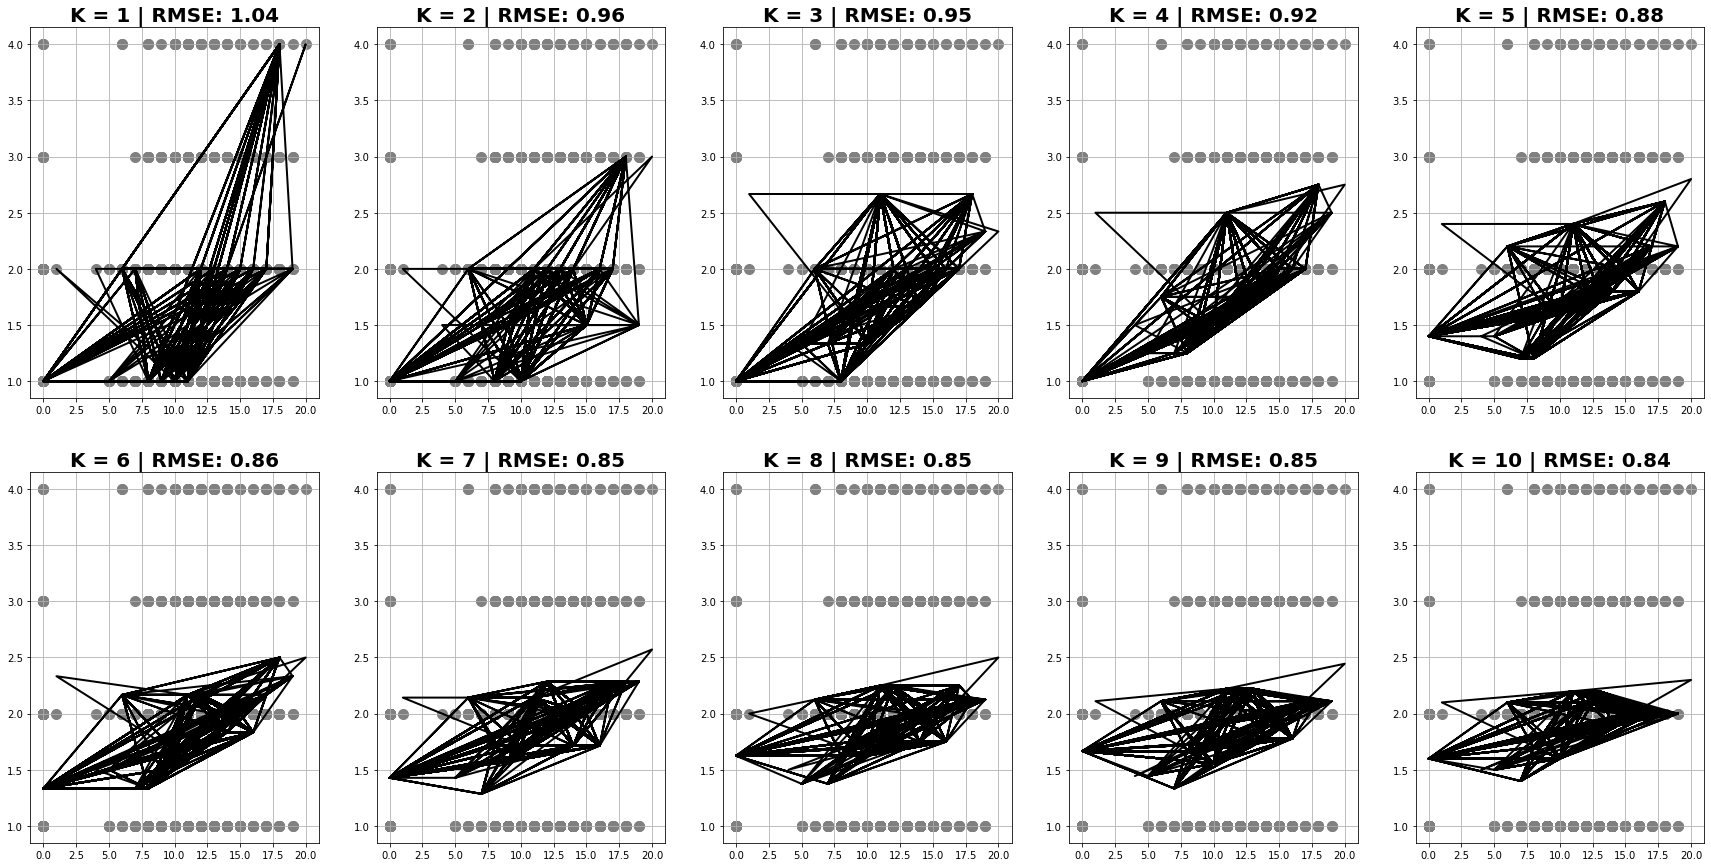

In [9]:
from sklearn.neighbors import KNeighborsRegressor

plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(X)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(X, knn.predict(X), c = 'black', lw = 2)
    plt.scatter(df['G3'], df['studytime'], s = 100, c = 'gray')
    plt.grid()

plt.show()

In [163]:
#Ainda nao me faz sentido, vou seguir com o exercício

In [10]:
#Dividir em treino e teste
from sklearn.model_selection import train_test_split
#25% dos dados vao pra teste
dftrain, dftest = train_test_split(df, test_size = 0.25, random_state = 0)
print(df.shape)
print(dftrain.shape)
print(dftest.shape)

(1044, 17)
(783, 17)
(261, 17)


In [11]:
df.isnull().sum()

sex           0
age           0
famsize       0
Pstatus       0
traveltime    0
studytime     0
schoolsup     0
famsup        0
paid          0
activities    0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
absences      0
G3            0
dtype: int64

In [153]:
#This means, if two variables are correlated, then the P-value will come very close to zero

In [12]:
'''
Criei uma funcao simples, pois quero ver como a analise se comporta sem normalizar os dados, 
muitos deles agora sao 0 ou 1  por isso nao vejo sentido em normalizar
'''
def preprocessamento_completo(df):

    dff = df.copy()
    
    dic_variavelSex = {"M":0, "F":1}
    dic_variable_01 = {"no":0, "yes":1}
    dic_variable_famsize = {"GT3":0, "LE3":1}
    dic_variable_pstatus= {"A":0, "T":1}
    
    dff['sex'] = dff.sex.map(dic_variavelSex)
    dff['schoolsup'] = dff.schoolsup.map(dic_variable_01)
    dff['famsup'] = dff.famsup.map(dic_variable_01)
    dff['paid'] = dff.paid.map(dic_variable_01)
    dff['activities'] = dff.activities.map(dic_variable_01)
    dff['internet'] = dff.internet.map(dic_variable_01)
    dff['romantic'] = dff.romantic.map(dic_variable_01)
    dff['famsize'] = dff.famsize.map(dic_variable_famsize)
    dff['Pstatus'] = dff.Pstatus.map(dic_variable_pstatus)
    
    return dff


In [13]:
dftrain  = preprocessamento_completo(df = dftrain)

In [14]:
dftest  = preprocessamento_completo(df = dftest)

In [15]:
dftrain

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
158,0,16,0,1,3,1,0,0,0,0,0,0,4,2,2,2,15
40,1,16,1,1,2,2,0,1,0,1,1,1,3,3,3,25,11
942,0,16,1,1,1,1,0,0,0,0,1,0,4,1,2,0,11
804,0,18,1,0,1,2,0,0,0,1,1,1,4,3,5,9,15
658,0,18,0,1,1,2,0,0,0,0,1,0,5,5,4,16,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0,17,0,1,2,2,0,0,0,1,1,0,4,4,3,4,16
763,0,18,1,1,1,1,0,1,0,0,1,0,4,2,5,2,11
835,0,16,0,1,2,2,0,1,0,1,0,1,5,4,5,0,0
559,0,16,1,1,1,1,0,0,0,1,0,1,4,4,4,6,10


In [16]:
dftest

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
247,0,22,0,1,1,1,0,0,0,0,1,1,5,4,5,16,8
1014,1,18,0,1,2,2,0,1,0,0,1,1,4,3,2,6,13
766,1,18,0,1,1,1,0,1,0,1,1,1,4,3,5,2,10
892,0,17,0,1,2,4,0,1,1,1,0,0,5,4,5,0,10
97,1,16,0,1,1,2,0,1,1,0,0,1,4,3,5,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,1,16,1,1,1,3,0,1,0,0,0,1,4,3,3,2,11
113,0,15,1,1,1,1,0,0,0,0,1,0,3,5,2,10,19
648,1,18,1,0,2,2,0,1,0,0,1,0,4,3,3,18,10
37,0,16,0,0,2,3,0,1,0,1,1,1,2,4,3,7,15


# Machine Learning

In [17]:
#algoritmos
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#metricas de performance
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
def RMSE(ytrue, ypred):
    return np.sqrt(mean_squared_error(y_true = ytrue, y_pred = ypred))

In [19]:
#Modelo de regresao linear
lin_reg = LinearRegression()
Xtrain = dftrain['G3'].values.reshape(-1,1)
ytrain = dftrain['studytime'].values

Xtest = dftest['G3'].values.reshape(-1,1)
ytest = dftest['studytime'].values

lin_reg.fit(X, y)

LinearRegression()

In [20]:
RMSE(ytrue = ytrain, ypred = lin_reg.predict(Xtrain))

0.8322469331196785

In [21]:
r2_score(y_true=ytrain, y_pred=lin_reg.predict(Xtrain))

0.02032752060538079

In [22]:
#Modelo KNN
num_vizinhos = [1, 2, 5, 10, 20, 50]

for n in num_vizinhos:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(Xtrain, ytrain)
    
    preds = knn.predict(Xtrain)
    
    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)
    
    print("K = " + str(n) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))



K = 1 | RMSE:1.08 / R2: -0.64
K = 2 | RMSE:0.99 / R2: -0.39
K = 5 | RMSE:0.88 / R2: -0.09
K = 10 | RMSE:0.85 / R2: -0.01
K = 20 | RMSE:0.84 / R2: 0.01
K = 50 | RMSE:0.83 / R2: 0.03


In [23]:
#Decision TREE
max_profundidades = [1, 5, 10, 100]

for m in max_profundidades:
    dt = DecisionTreeRegressor(max_depth = m)
    dt.fit(Xtrain, ytrain)
    
    preds = dt.predict(Xtrain)
    
    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)
    
    print("Profundidade da árvore = " + str(m) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

Profundidade da árvore = 1 | RMSE:0.83 / R2: 0.03
Profundidade da árvore = 5 | RMSE:0.82 / R2: 0.05
Profundidade da árvore = 10 | RMSE:0.82 / R2: 0.05
Profundidade da árvore = 100 | RMSE:0.82 / R2: 0.05


In [24]:
#Validacao cruzada
from sklearn.model_selection import cross_val_score

cv_lin_reg = cross_val_score(estimator = LinearRegression(), 
                             X = Xtrain, 
                             y = ytrain, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_lin_reg)
print('media: ', cv_lin_reg.mean())
print('desvio padrão: ', cv_lin_reg.std())

[ 0.02092566  0.02067243  0.03370514 -0.04103793  0.03765078]
media:  0.014383215262313476
desvio padrão:  0.02852569715504889


In [25]:
def cross_validation_R2_results(modelo, nome_modelo, X, y, num_folds):
    cv_results = cross_val_score(estimator = modelo, 
                                 X = Xtrain, 
                                 y = ytrain, 
                                 cv = num_folds, 
                                 scoring = 'r2') 
    modelo.fit(Xtrain, ytrain)
    r2_train = r2_score(y_true=ytrain, y_pred=modelo.predict(Xtrain))
    plt.figure(figsize=[8,6])
    plt.scatter(range(1, 1+num_folds), cv_results, c = 'blue', s = 100)
    plt.plot(range(1, 1+num_folds), cv_results, c = 'blue', lw = 2, label = 'R2 Fold')
    plt.xticks(range(1, 1+num_folds))
    plt.yticks(np.arange(-2, 1.1, 0.1))
    plt.plot(range(1, 1+num_folds), [cv_results.mean()] * num_folds, c = 'red', lw = 2, label = 'R2 Cross-val Médio')
    
    
    plt.plot(range(1, 1+num_folds), [cv_results.mean() + cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '+1 desv. padrão margem')
    plt.plot(range(1, 1+num_folds), [cv_results.mean() - cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '-1 desv. padrão margem')
    
    plt.plot(range(1, 1+num_folds), [r2_train] * num_folds, '--' ,c = 'black', lw = 3, label = 'R2 Treino')
    plt.legend(fontsize = 10, bbox_to_anchor = [1.4,1.])
    plt.ylim([-2,1.05])
    plt.grid()
    plt.ylabel("R2 Score", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Folds", fontsize = 14, fontweight = 'bold')
    plt.title(nome_modelo + " | R2 TREINO/VAL: "+ str(np.round(r2_train,2)) +" / "+ str(np.round(cv_results.mean(),2)),
              fontsize = 14, fontweight = 'bold')
    plt.show()

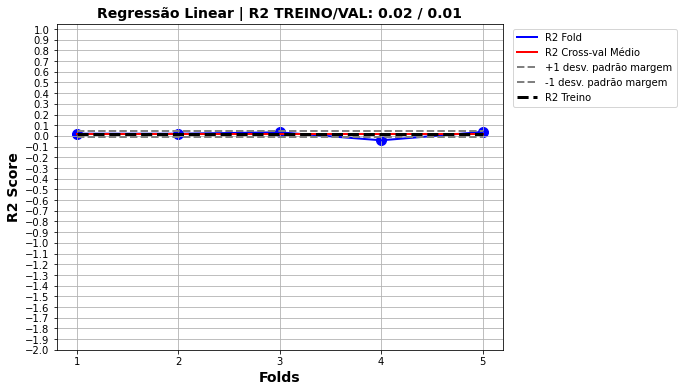

In [26]:
cross_validation_R2_results(modelo = LinearRegression(),
                           nome_modelo = 'Regressão Linear',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

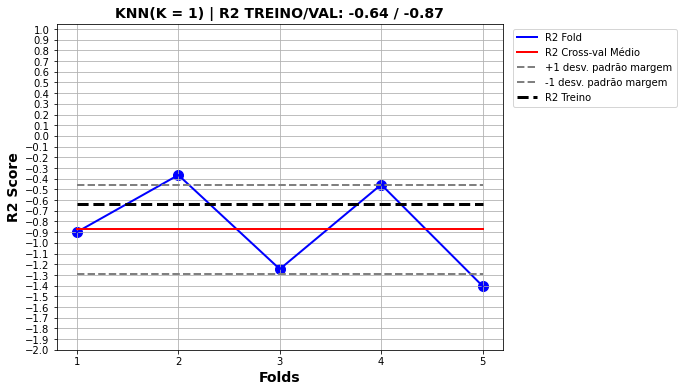

In [27]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 1),
                           nome_modelo = 'KNN(K = 1)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

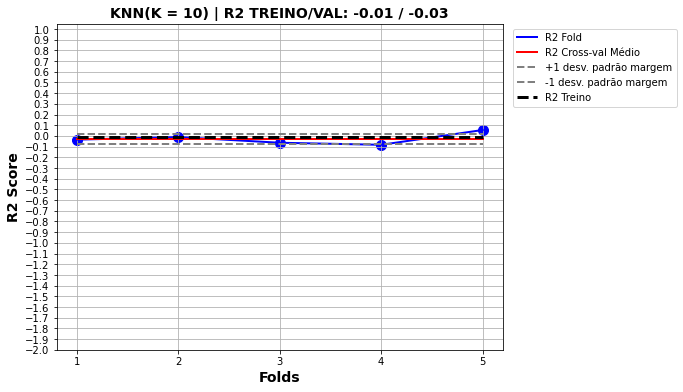

In [28]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 10),
                           nome_modelo = 'KNN(K = 10)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

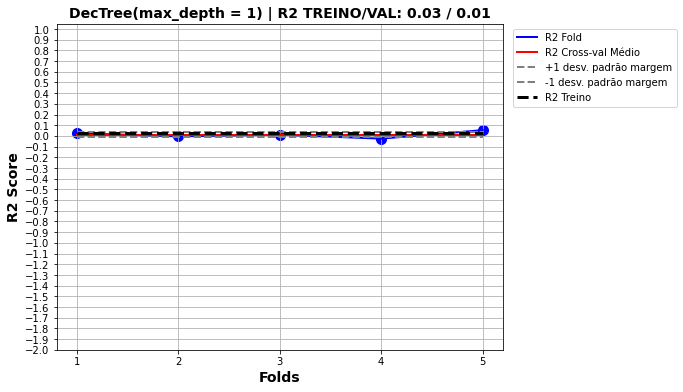

In [29]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 1),
                           nome_modelo = 'DecTree(max_depth = 1)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

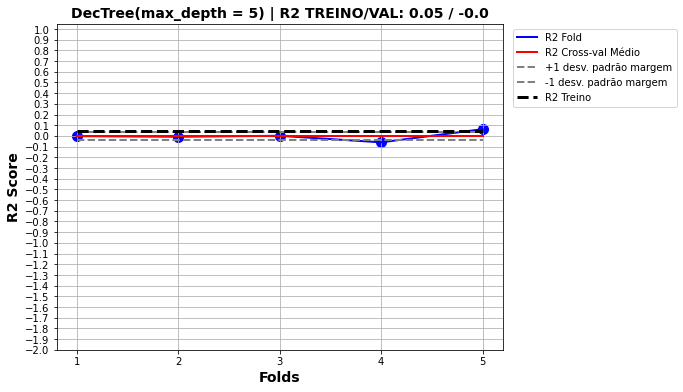

In [30]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 5),
                           nome_modelo = 'DecTree(max_depth = 5)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

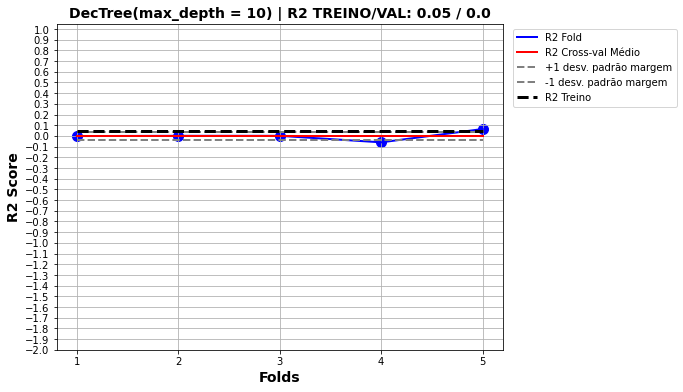

In [31]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 10),
                           nome_modelo = 'DecTree(max_depth = 10)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

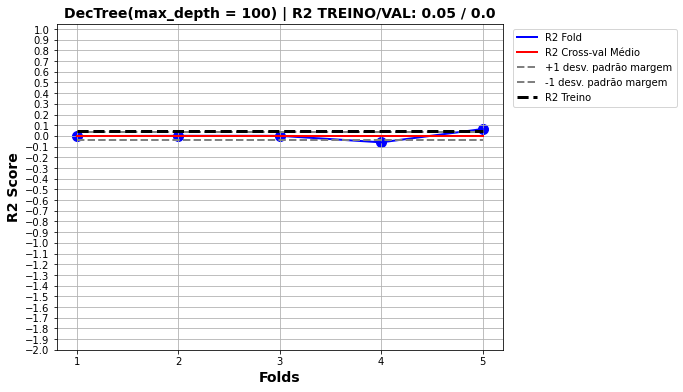

In [32]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 100),
                           nome_modelo = 'DecTree(max_depth = 100)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

In [33]:
#Etapa FINAL
modelo_final = KNeighborsRegressor(n_neighbors = 10)
modelo_final.fit(Xtrain, ytrain)

KNeighborsRegressor(n_neighbors=10)

In [34]:
preds_modelo_final = modelo_final.predict(Xtest)

In [35]:
#R2 em teste
r2_score(y_true = ytest, y_pred = preds_modelo_final)

-0.027023163791570104

In [36]:
rmse_teste_final = RMSE(ytrue = ytest, ypred = preds_modelo_final)
rmse_teste_final

0.823528526352594

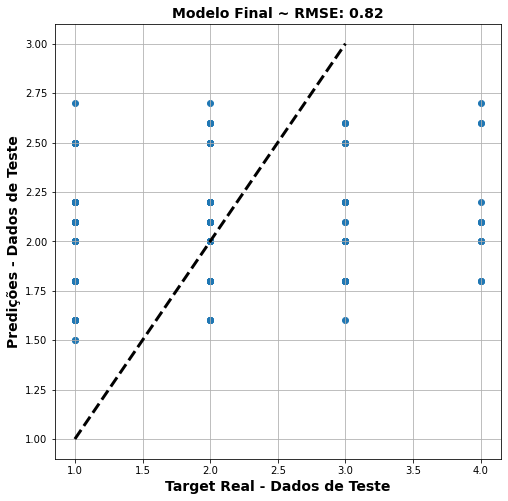

In [37]:
plt.figure(figsize=[8,8])
plt.title("Modelo Final ~ RMSE: " + str(np.round(rmse_teste_final,2)), fontweight = 'bold', fontsize = 14)
plt.scatter(ytest, preds_modelo_final)
plt.xlabel("Target Real - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.ylabel("Predições - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.grid()
range_line = int(np.maximum(max(ytest), max(preds_modelo_final)))
plt.plot(range(1, range_line), range(1, range_line), '--' ,c = 'black', lw = 3)
plt.show()

In [38]:
#Refazendo a analise com outra variavel (internet x G3)

In [39]:
#Modelo de regresao linear
lin_reg = LinearRegression()
Xtrain = dftrain['G3'].values.reshape(-1,1)
ytrain = dftrain['internet'].values

Xtest = dftest['G3'].values.reshape(-1,1)
ytest = dftest['internet'].values

lin_reg.fit(X, y)

LinearRegression()

In [40]:
RMSE(ytrue = ytrain, ypred = lin_reg.predict(Xtrain))

1.2431024891751956

In [41]:
r2_score(y_true=ytrain, y_pred=lin_reg.predict(Xtrain))

-8.460653477820811

In [42]:
#Modelo KNN
num_vizinhos = [1, 2, 5, 10, 20, 50]

for n in num_vizinhos:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(Xtrain, ytrain)
    
    preds = knn.predict(Xtrain)
    
    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)
    
    print("K = " + str(n) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))


K = 1 | RMSE:0.56 / R2: -0.95
K = 2 | RMSE:0.48 / R2: -0.42
K = 5 | RMSE:0.42 / R2: -0.07
K = 10 | RMSE:0.41 / R2: -0.04
K = 20 | RMSE:0.41 / R2: -0.01
K = 50 | RMSE:0.4 / R2: 0.02


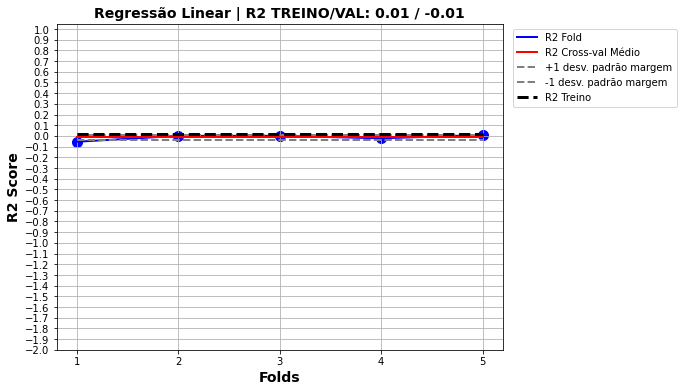

In [43]:
cross_validation_R2_results(modelo = LinearRegression(),
                           nome_modelo = 'Regressão Linear',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

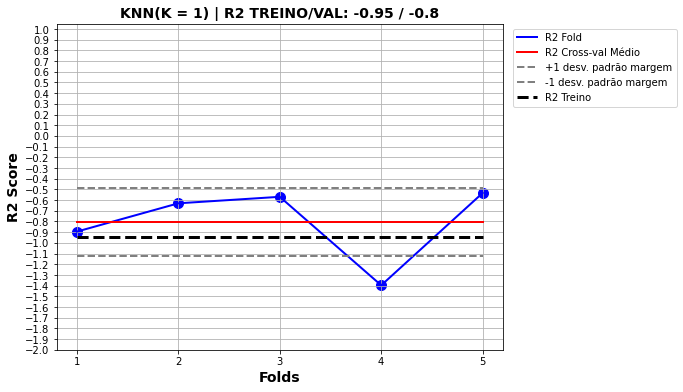

In [44]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 1),
                           nome_modelo = 'KNN(K = 1)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

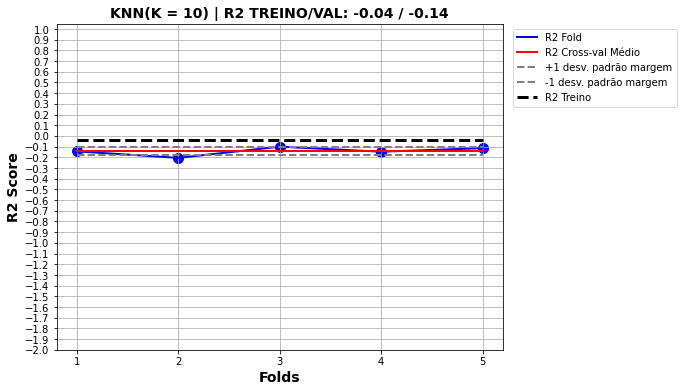

In [45]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 10),
                           nome_modelo = 'KNN(K = 10)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

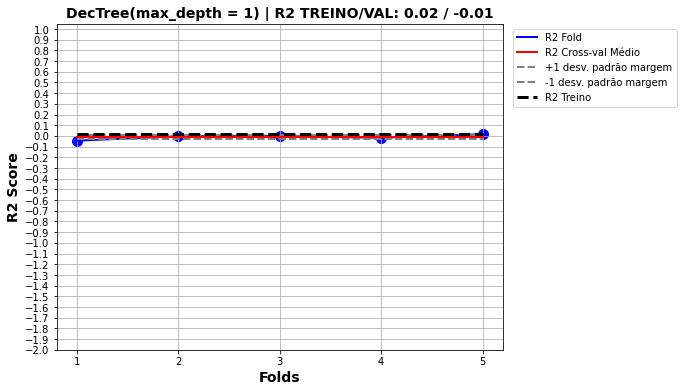

In [46]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 1),
                           nome_modelo = 'DecTree(max_depth = 1)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

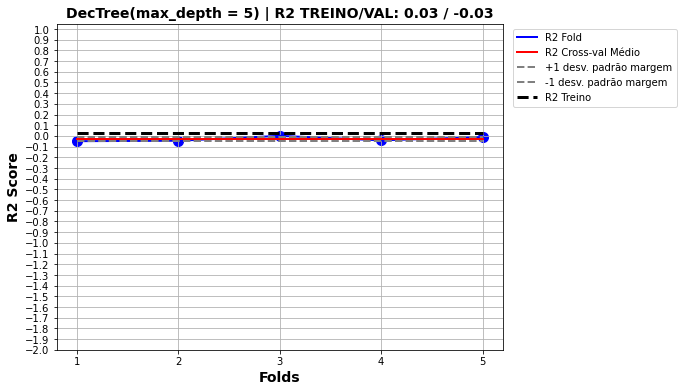

In [47]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 5),
                           nome_modelo = 'DecTree(max_depth = 5)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

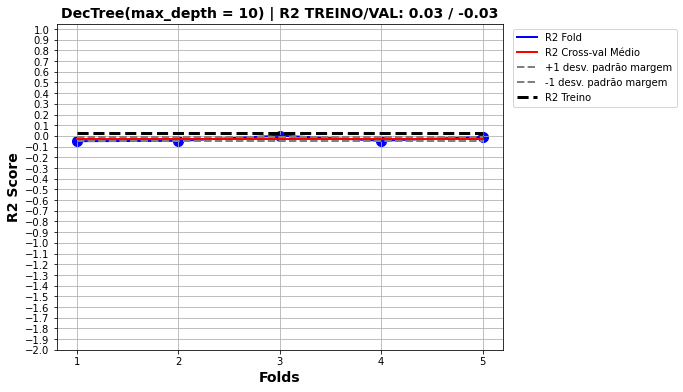

In [48]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 10),
                           nome_modelo = 'DecTree(max_depth = 10)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

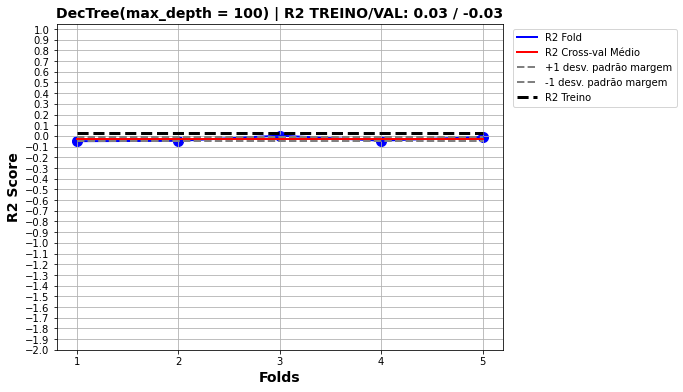

In [49]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 100),
                           nome_modelo = 'DecTree(max_depth = 100)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

In [50]:
#Etapa FINAL
#Decision tree parece ter sido melhor
modelo_final = DecisionTreeRegressor(max_depth = 10)
modelo_final.fit(Xtest, ytest)

DecisionTreeRegressor(max_depth=10)

In [51]:
preds_modelo_final = modelo_final.predict(Xtest)

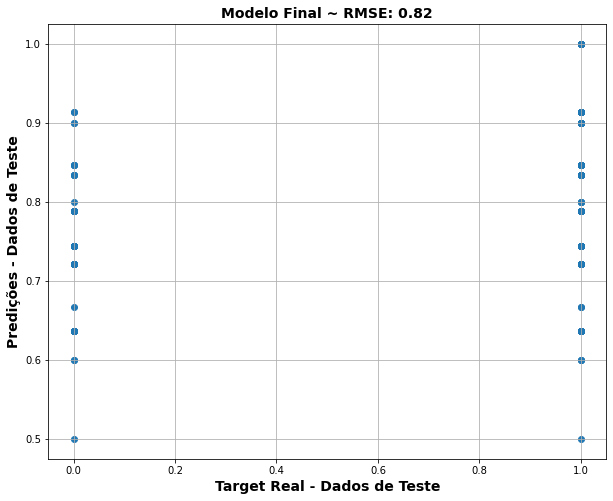

In [52]:
plt.figure(figsize=[10,8])
plt.title("Modelo Final ~ RMSE: " + str(np.round(rmse_teste_final,2)), fontweight = 'bold', fontsize = 14)
plt.scatter(ytest, preds_modelo_final)
plt.xlabel("Target Real - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.ylabel("Predições - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.grid()
range_line = int(np.maximum(max(ytest), max(preds_modelo_final)))
plt.plot(range(1, range_line), range(1, range_line), '--' ,c = 'black', lw = 3)
plt.show()

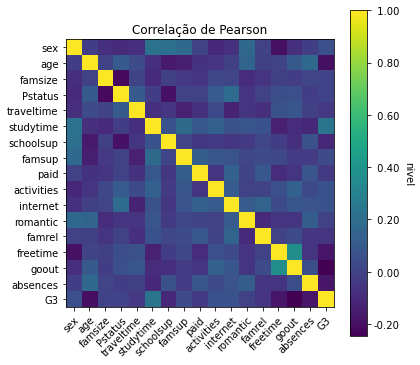

In [53]:
import matplotlib.pyplot as plt

corrs = dftest[['sex','age','famsize','Pstatus','traveltime','studytime','schoolsup','famsup','paid','activities','internet','romantic','famrel','freetime','goout','absences','G3']].corr().values
corrs
fig, ax = plt.subplots(figsize = [6,6])
# Filtrando apenas algumas colunas:
columns = ['sex','age','famsize','Pstatus','traveltime','studytime','schoolsup','famsup','paid','activities','internet','romantic','famrel','freetime','goout','absences','G3']

#Cria a imagem da matriz de correalções
im = ax.imshow(corrs)
#---- Até aqui já teriamos a visualização desejada, mas podemos customizar ainda mais:
# Vamos colocar os nomes das colunas no eixo x e y:

ax.set_xticks(np.arange(len(columns))) #define númeto de itens no eixo
ax.set_yticks(np.arange(len(columns)))

ax.set_xticklabels(columns) # nomeia os itens do eixo
ax.set_yticklabels(columns)

# Rotacionamos os nomes das colunas para não ficar um nome sobre o outro
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Título do gráfico
ax.set_title("Correlação de Pearson")

# Criando a barrinha ao lado para legenda das cores:
cbar = ax.figure.colorbar(im, ax=ax,format='% .2f') # im - cores, ax - itens do eixo
cbar.ax.set_ylabel('nivel', rotation=-90, va="bottom") # label para a barra
plt.show()